# **Waze Project**
**Data provided as part of the Google Advanced Data Analytics Certification (Offered Through Coursera)**

**Scenario**:  A new project at Waze has been proposed to help prevent user churn for the Waze app, focusing on monthly user churn. Churn is a quantitative measurement of the number of users who have uninstalled or stopped using the Waze app. The larger goal is increase growth through high retention rates, which is an indication of satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model can help prevent churn and improve user retention, ultimately driving Waze's growth. This predictive model can also help identify factors that contribute to churn and answer questions like: 
> - Who are the users most likely to churn?
> - Why do users churn?
> - When do users churn?<br>

If Waze can identify users with a high risk of churning, then these users could potentially be engaged with incentives to stay with Waze.


Devlierables for this project include:
> - Inspection of the dataset before analysis begins
> - Determination of what the Waze data provides by using exploratory data analysis (EDA)
> - Development of a machine learning model
>> - Testing of the model to assure the model is delivering consistent results
> - Determine whether or not the model meets project requirements

### Inspection and Understanding of the data

In [2]:
# Import necessary libraries and packages:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset into a dataframe:
df = pd.read_csv('waze_dataset.csv')

In [4]:
# Display the first few lines of the dataframe to understand the organization:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In order to better understand what the column names mean, clarification was obtained from the data owner:<br>
**ID**: Sequential numbered index<br>
**label**: Binary target variable ("retained" vs "churned") for if a user has churned anytime during the course of the month<br>
**sessions**: The number of occurrences of a user opening the app during the month<br>
**drives**: An occurence of driving at least 1 km during the month<br>
**device**: The type of device a user starts a session with<br>
**total_sessions**: A model estimate of the total number of sessions since a user has onboarded<br>
**n_days_after_onboarding**: The number of days since a user signed up for the app<br>
**total_navigations_fav1**: Total navigations since onboarding to the user's favorite place 1<br>
**total_navigations_fav2**: Total navigations since onboarding to the user's favorite place 2<br>
**driven_km_drives**: Total kilometers driven during the month<br>
**duration_minute_drives**: Total duration driven in minutes during the month<br>
**activity_days**: Number of days the user opens the app during the month<br>

In [5]:
# Determine data types and check for any missing entries:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Observations:<br>
1. The dataframe contains categorical, text and numerical data (floats and integers) with 14,999 rows and 13 columns.
2. The **label** column is missing 700 values.

Initial investigation of the missing **label** values should be done to determine what, if any, effect they may have on the dataset. First, the summary statistics of the missing 700 values will be compared to the remainder of the dataset to check for any significant differences.

In [6]:
# Isolate the rows with null values:
null_df = df[df['label'].isnull()]
# Then display the summary stats of these rows:
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
# Isolate rows without null values:
not_null_df = df[~df['label'].isnull()]

# Then display the summary stats of these rows
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Looking at the two summary statistics tables above, there doesn't appear to be any significant difference between them:  in particular, the means and standard deviations are fairly consistent. This could mean several things:
> 1. The null values might be occuring randomly across the dataset, indicating that their presence doesn't follow any specific pattern or reason and suggesting that the missing data might not have a distinct relationship with the rest of the dataset.
> 2. The absence of a significant difference in the summary statistics could imply that the missing data are unrelated to the available data.
> 3. The absence of significant statistical differences between the two groups might indicate that the missing values aren't introducing a substantial bias into the dataset. This means that excluding or imputing the null values might not significantly alter the overall distribution or statistical properties of the dataset.

Using the two null and non-null populations created above, the **device** variable will be checked against these populations to see if there biases due to the device used.

In [8]:
# Determine the number of iPhone and Android users in the null dataset:
null_df['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

In [9]:
# Calculate the percentage of null values by each device:
round((null_df['device'].value_counts(normalize = True) * 100), 2)


iPhone     63.86
Android    36.14
Name: device, dtype: float64

Compare the results above to the device ratios and percentages for the full dataset.

In [10]:
# Determine the number of iPhone and Android users in the full dataset:
df['device'].value_counts()

iPhone     9672
Android    5327
Name: device, dtype: int64

In [11]:
# Calculate the percentage for devices in the full dataset:
round((df['device'].value_counts(normalize = True) * 100), 2)

iPhone     64.48
Android    35.52
Name: device, dtype: float64

Looking at the calculations above comparing device ratios and percentages for the null-only dataframe and the full dataframe, the percentage of missing values by each device is consistent with the percentages for all values in the dataset. Given this data, the missing values appear to be random--not having a specific reason for being omitted.

Next, compare variables for churned vs retained users to help determine which will be most useful for a machien learning model.

In [12]:
# Examine counts and percentages of churned and retained users:
print(df['label'].value_counts())
print()
print((df['label'].value_counts(normalize = True) * 100))

retained    11763
churned      2536
Name: label, dtype: int64

retained    82.264494
churned     17.735506
Name: label, dtype: float64


These results show that the dataset is comprised of 82% retained users and 18% churned users.

Medians of each variable for churned and retained users should be compared next. Using median values, and not the means, prevents outliers from affecting the comparison. For example, looking back at the summary statistics for the dataset, the max value for **driven_km_drives** is 21,183 km which seems very unreasonable for a total monthly driving distance.

In [13]:
# Calculate the median of all numerical columns for churned and retained users
df.groupby('label').median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


The median data above present some interesting observations/comparisons between the two groups. Even though churned users have either stopped using or removed the app, the data show that within a month these users compared to retained users:
> -Took more drives<br>
> -Opened the app more frequently<br>
> -Navigated to their two favorite places more frequently<br>
> -Drove farther and for a longer time<br>

This behavior could be indicative of a user using the app more frequently in order to decide if the app is worth keeping, or may point to some other problem with the app that the data aren't capturing and is causing users to churn. Whatever the reason, this data seems to present a decent profile of a churned user.

Next, determine the median kilometers per drive (in the last month) for both churned and retained users.

In [14]:
# First, group the data by label and determine the medians:
medians = df.groupby('label').median(numeric_only = True)
print('Median kilometers by drive:')

# Divide median distance by the median number of drives
round((medians['driven_km_drives'] / medians['drives']),2)

Median kilometers by drive:


label
churned     73.05
retained    73.72
dtype: float64

The data above show that both churned and retained users drove about 73 km per drive. Determine how many kilometers per driving day this represents:

In [15]:
# Divide the median driving distance by the median number of driving days:
print('Median kilometers per driving day:')
round((medians['driven_km_drives'] / medians['driving_days']),2)

Median kilometers per driving day:


label
churned     608.78
retained    247.48
dtype: float64

Next determine the median number of drives per driving day for each group.

In [16]:
# Divide the median number of drives by the median number of driving days:
print('Median drives per driving day:')
round((medians['drives'] / medians['driving_days']),2)

Median drives per driving day:


label
churned     8.33
retained    3.36
dtype: float64

Looking at the data above for churned vs retained users, the median drives per day for a churned user is over 8 with a median of over 608 km driven per day. These numbers are significantly higher than those for retained drivers and it is probably important to understand why. 

The numbers clearly show that all users, regardless of whether they stopped using the service or not, seem to be drivers who travel long distances daily. This suggests that this data might not represent the usual driving habits of most people. It looks like the data, especially from users who stopped using the service, might mostly include someone like long-distance truck drivers.

Considering how much these users drive, it might be a good idea for Waze to collect more information about these super-drivers. Maybe the reason they drive so much is also why the Waze app doesn't work well for them, as their needs might be different from those of typical commuters.

Finally, it would be worth understanding considering any differences between user type and device type.

First, determine the number of each device by user type and calculate the percentages

In [17]:
# For each user (label), determine the number of Android and iPhone users:
print(df.groupby(['label', 'device']).size())
print()

# Calculate the percentages
round((df.groupby('label')['device'].value_counts(normalize = True)) * 100, 2)

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64



label     device 
churned   iPhone     64.87
          Android    35.13
retained  iPhone     64.44
          Android    35.56
Name: device, dtype: float64

The data above show the ratio of iPhone and Android users is consistent between churned and retained users.

### Exploratory Data Analysis (EDA)

EDA is the next step in further understanding and exploring the Waze data in order to prepare for developing a machine learning model to predict user churn. EDA will consist of futher data exploration and cleaning as well as build visualizations to better understand the data.

Considering the initial analysis above, the most applicable data columns for predictive modeling are those dealing with user behavior, especially concerning user churn. The primary column of interest is the 'label,' which directly ties to churn. Additionally, variables linked to user behaviors significantly contribute to understanding churn patterns. This means that all variables, except 'ID,' provide insights into user behaviors and are pertinent to the churn analysis.

Outliers will also be identified and a determination made as to how to handle them for the purpose of this analysis: keep, delete or reassign them. Boxplots will be used to visualize the outliers and histograms to understand variable distribution. Scatterplots and bar charts may be useful as well depending on what needs understood and communicated.

In [18]:
# First, load visualization libraries seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Boxplots and histograms of all relevant variables will be prepared to understand outliers and distribution.

### **sessions**
(number of occurences of a user opening the app during the month)

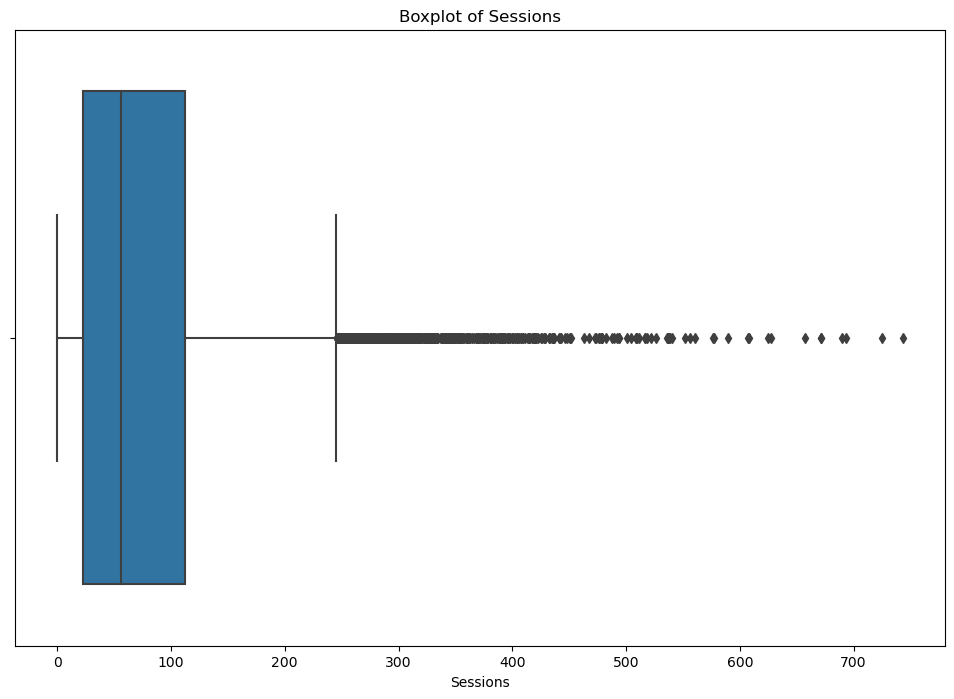

In [19]:
# Create a boxplot of sessions
plt.figure(figsize = (12,8))
sns.boxplot(x = 'sessions',
           data = df)
plt.xlabel('Sessions')
plt.title('Boxplot of Sessions')
plt.show()

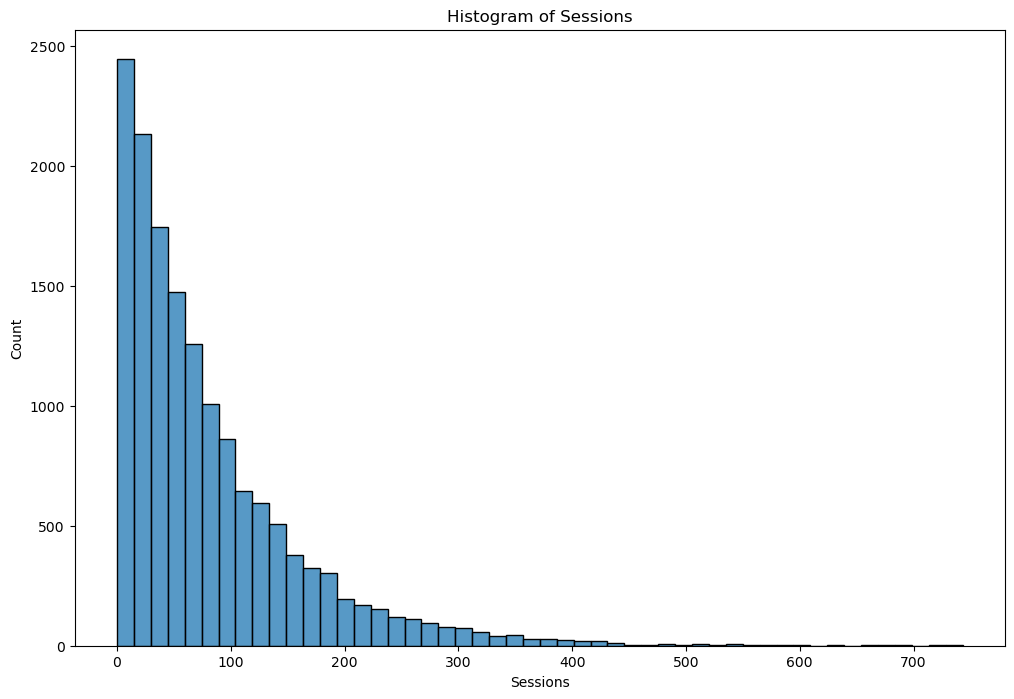

In [20]:
# Create a histogram of sessions
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'sessions',
             bins = 50)
plt.xlabel('Sessions')
plt.title('Histogram of Sessions')
plt.show()

The sessions variable shows a right-skewed distribution with about half of the observations having around 50 or fewer sessions. The boxplot shows some users have more than 700.

### **drives**
(an occurance of driving at least 1 km during the month)

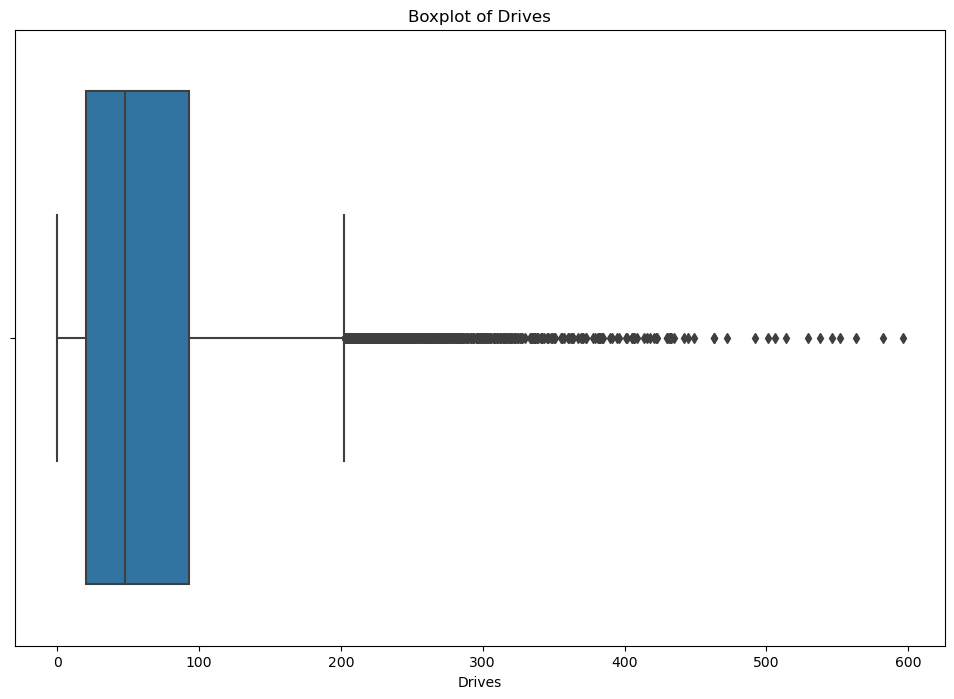

In [21]:
# Create a boxplot of drives
plt.figure(figsize = (12,8))
sns.boxplot(x = 'drives',
           data = df)
plt.xlabel('Drives')
plt.title('Boxplot of Drives')
plt.show()

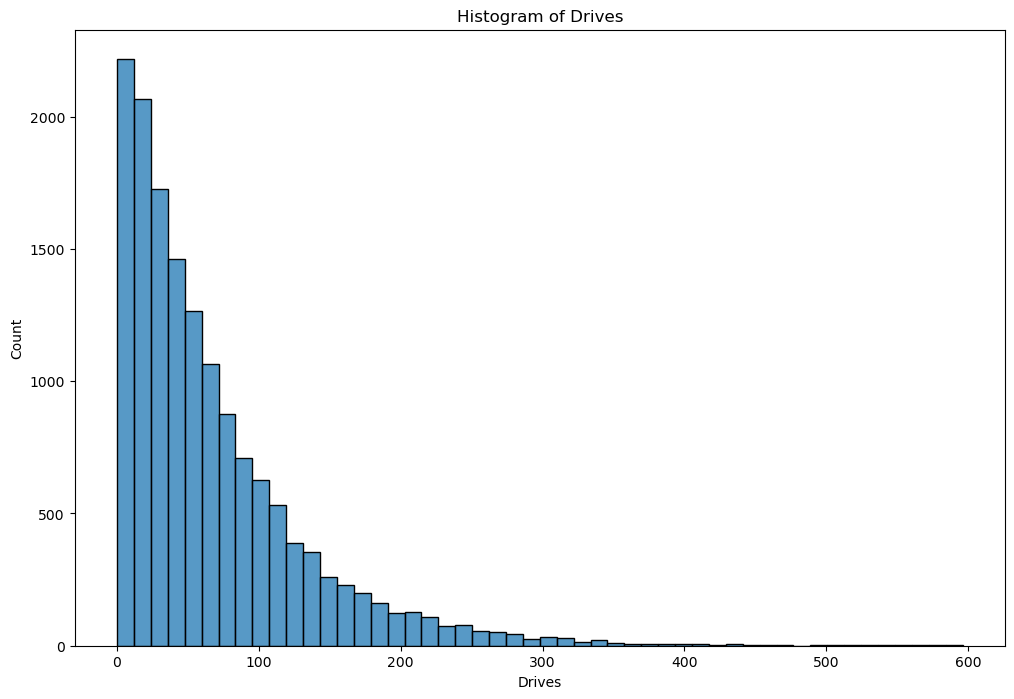

In [22]:
# Create a histogram of drives
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'drives',
             bins = 50)
plt.xlabel('Drives')
plt.title('Histogram of Drives')
plt.show()

The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of about 50. However, some drivers had well over 400 drives in the last month.

### **total_sessions**
(a model estimate of the total number of sessions since a user has onboarded)

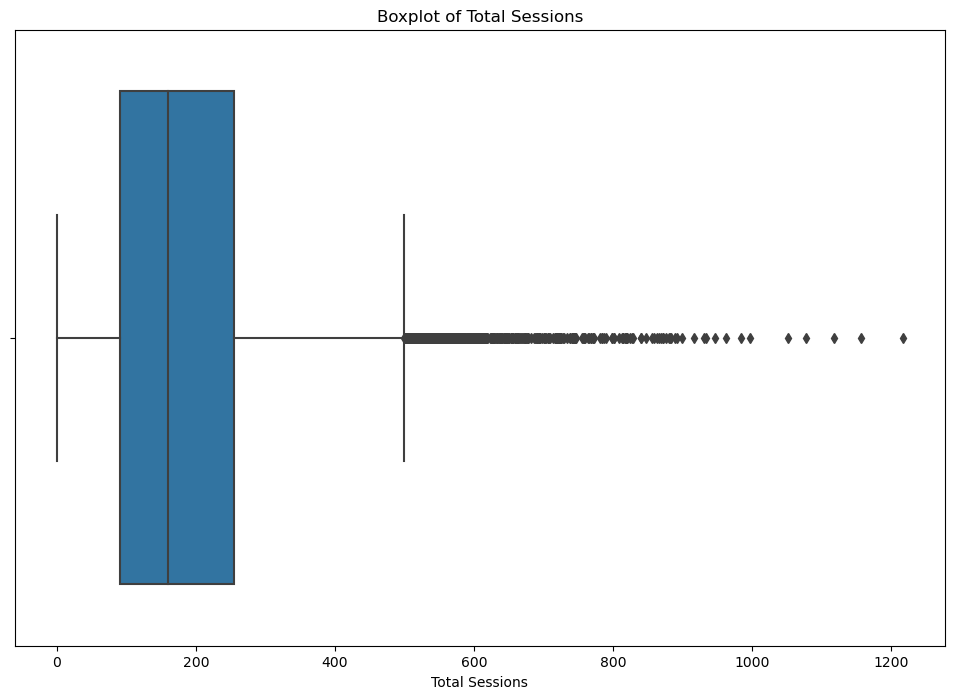

In [23]:
# Create a boxplot of total_sessions
plt.figure(figsize = (12,8))
sns.boxplot(x = 'total_sessions',
           data = df)
plt.xlabel('Total Sessions')
plt.title('Boxplot of Total Sessions')
plt.show()

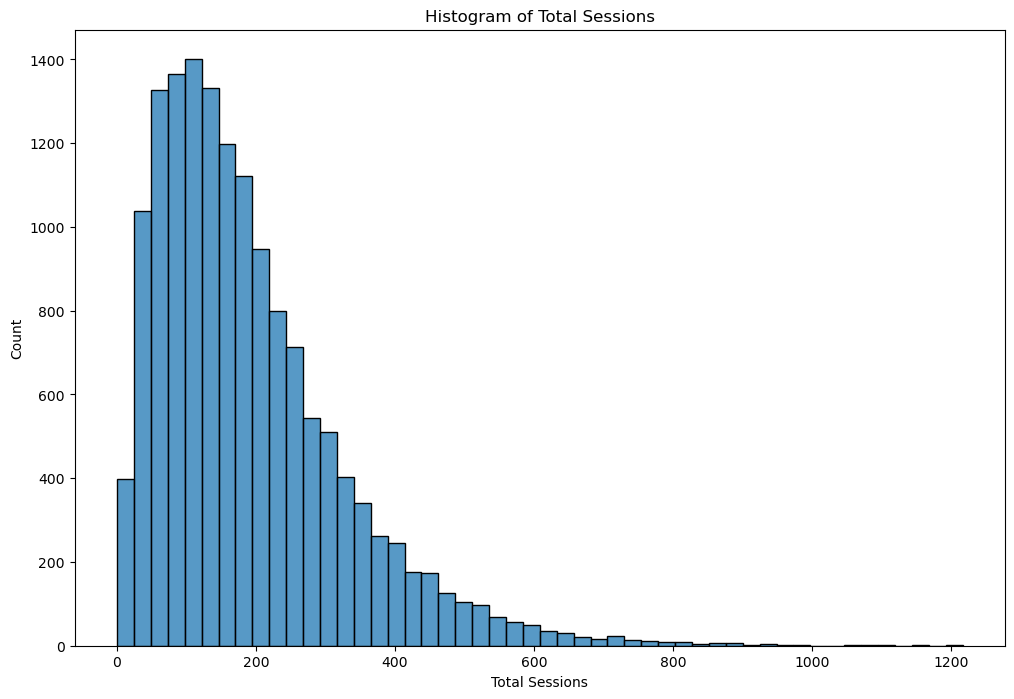

In [24]:
# Create a histogram of total_sessions
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'total_sessions',
             bins = 50)
plt.xlabel('Total Sessions')
plt.title('Histogram of Total Sessions')
plt.show()

The total_sessions variable has a right-skewed distribution. The median total number of sessions is around 150. This is interesting because if the median number of sessions in the last month was ~50 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. 

### **n_days_after_onboarding**
(number of days since a user signed up for the app)

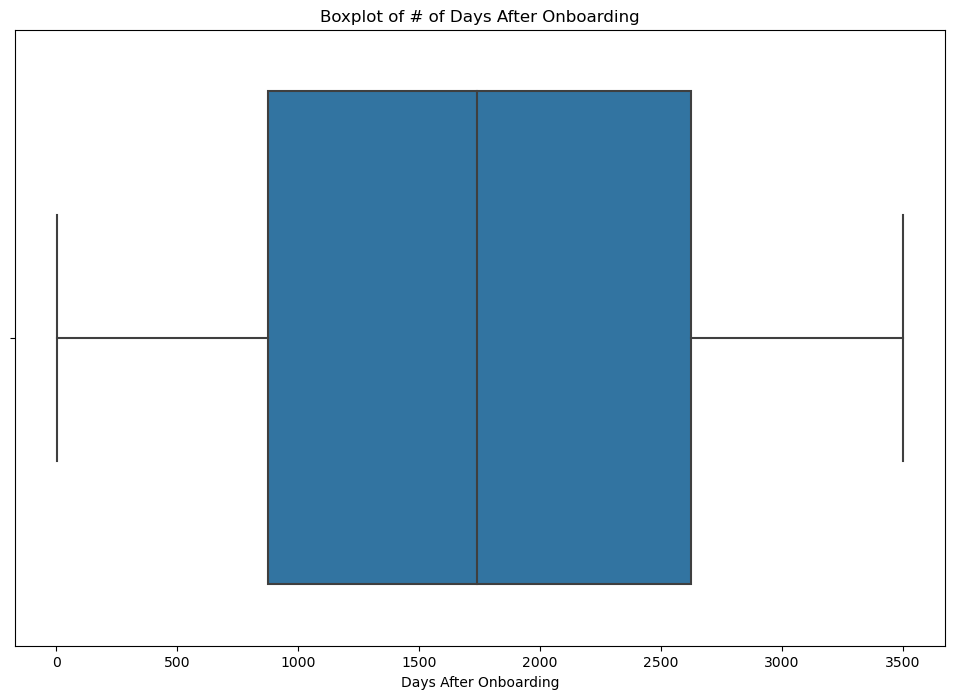

In [25]:
# Create a boxplot of n_days_after_onboarding
plt.figure(figsize = (12,8))
sns.boxplot(x = 'n_days_after_onboarding',
           data = df)
plt.xlabel('Days After Onboarding')
plt.title('Boxplot of # of Days After Onboarding')
plt.show()

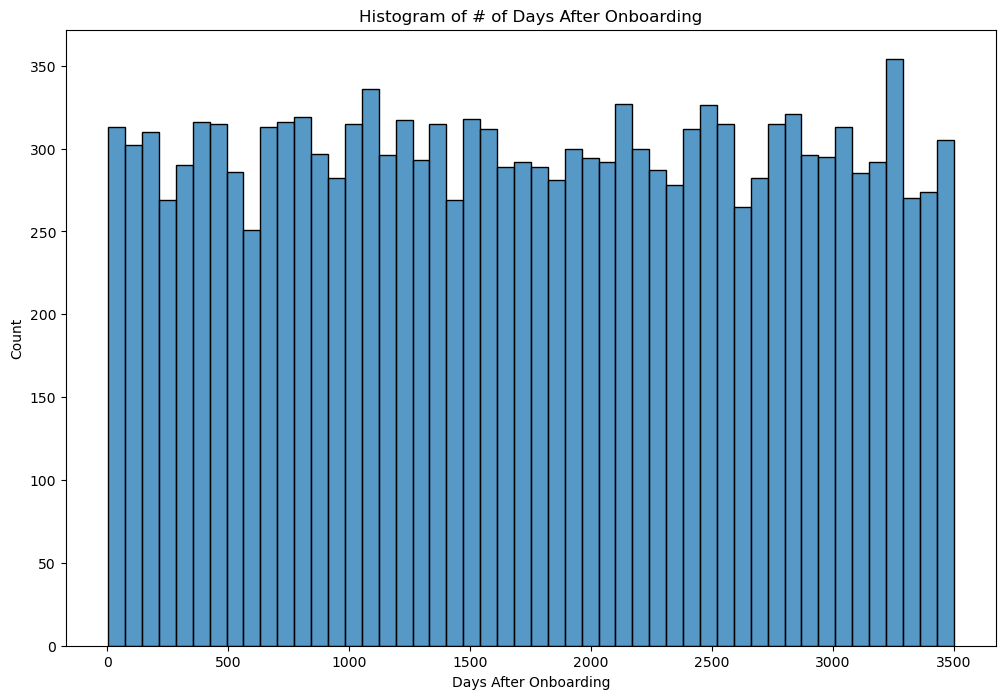

In [26]:
# Create a histogram of n_days_after_onboarding
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'n_days_after_onboarding',
             bins = 50)
plt.xlabel('Days After Onboarding')
plt.title('Histogram of # of Days After Onboarding')
plt.show()

The days after onboarding variable shows uniform distribution wtih values ranging from near 0 to about 3,500 days (~9.7 years).

### **driven_km_drives**
(total kilometers driven during the month)

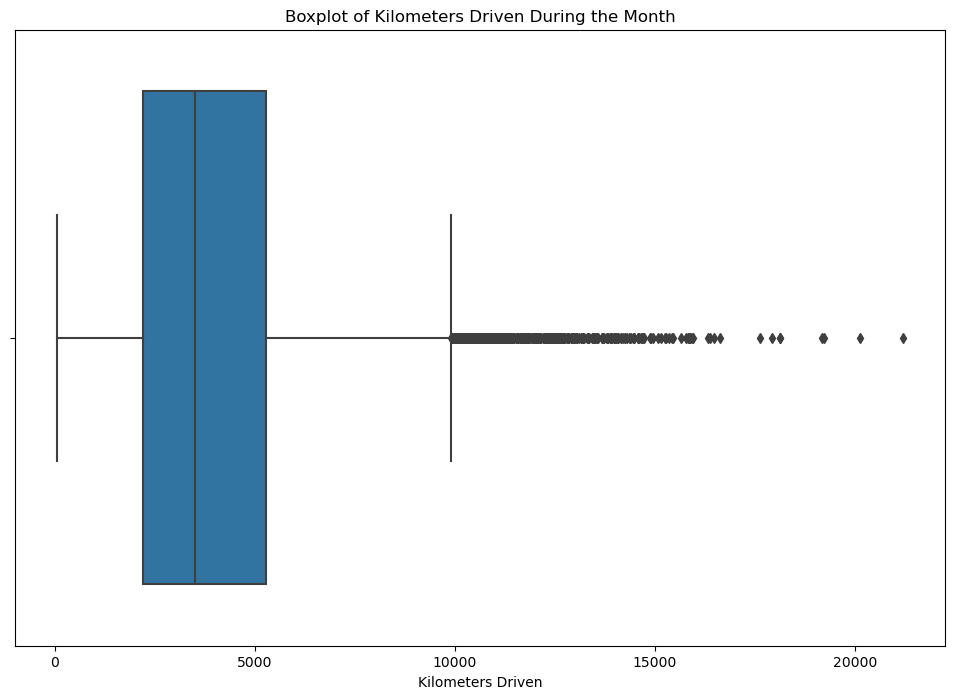

In [27]:
# Create a boxplot of driven_km_drives
plt.figure(figsize = (12,8))
sns.boxplot(x = 'driven_km_drives',
           data = df)
plt.xlabel('Kilometers Driven')
plt.title('Boxplot of Kilometers Driven During the Month')
plt.show()

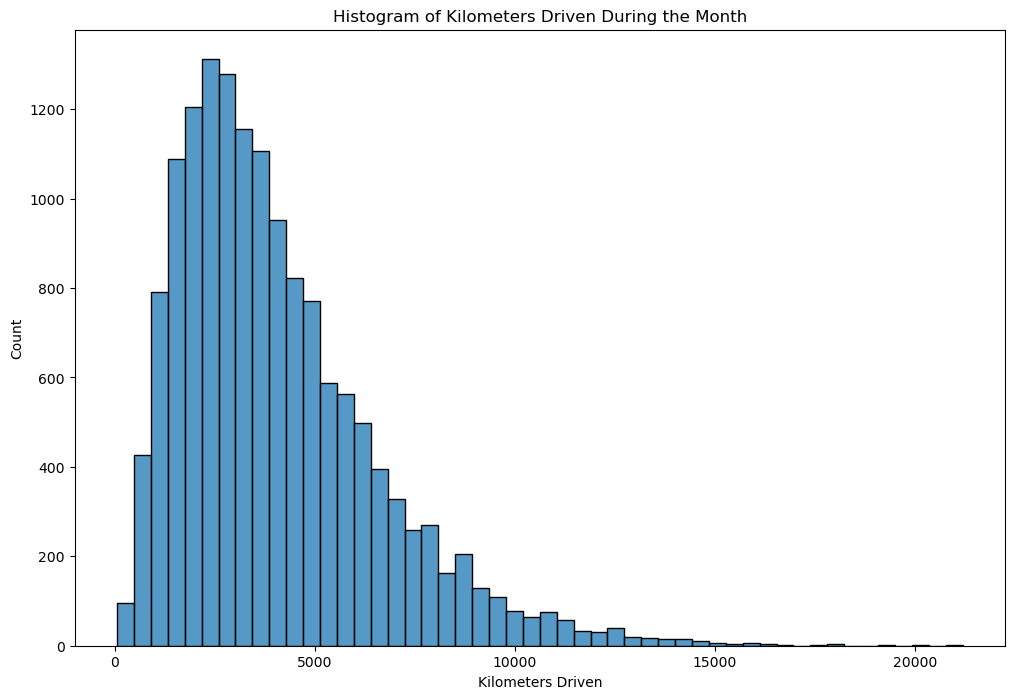

In [28]:
# Create a histogram of driven_km_drives
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'driven_km_drives',
             bins = 50)
plt.xlabel('Kilometers Driven')
plt.title('Histogram of Kilometers Driven During the Month')
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under about 3,500 kilometers.

### **duration_minutes_drives**
(total duration driven in minutes during the month)

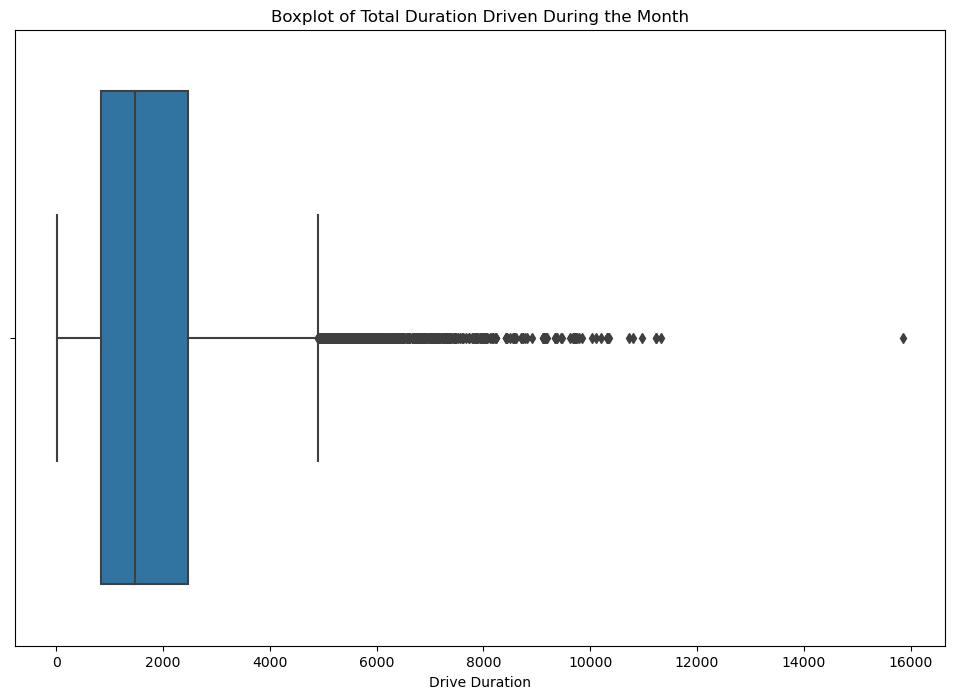

In [29]:
# Create a boxplot of duration_minutes_drives
plt.figure(figsize = (12,8))
sns.boxplot(x = 'duration_minutes_drives',
           data = df)
plt.xlabel('Drive Duration')
plt.title('Boxplot of Total Duration Driven During the Month')
plt.show()

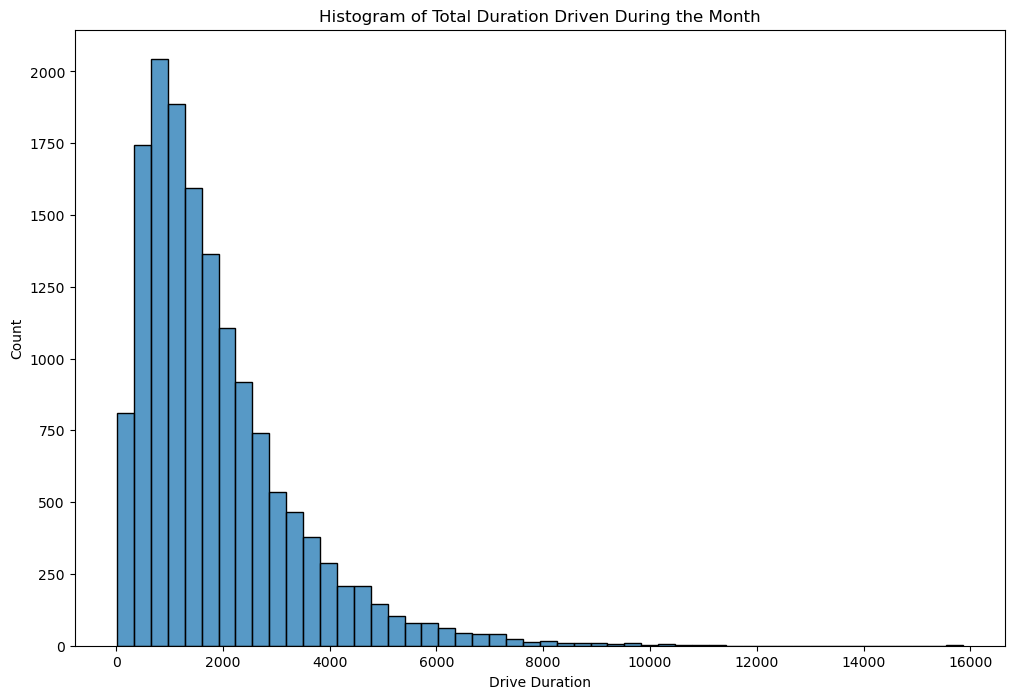

In [30]:
# Create a histogram of duration_minutes_drives
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'duration_minutes_drives',
             bins = 50)
plt.xlabel('Drive Duration')
plt.title('Histogram of Total Duration Driven During the Month')
plt.show()

The duration_minutes_drives variable is right-skewed with the boxplot data showing half the users driving less than about 1500 minutes. Additionally, the boxplot shows some users driving nearly 16,000 minutes (267 hours) per month.

### **activity_days**
(number of days a user opens the Waze app during the month)

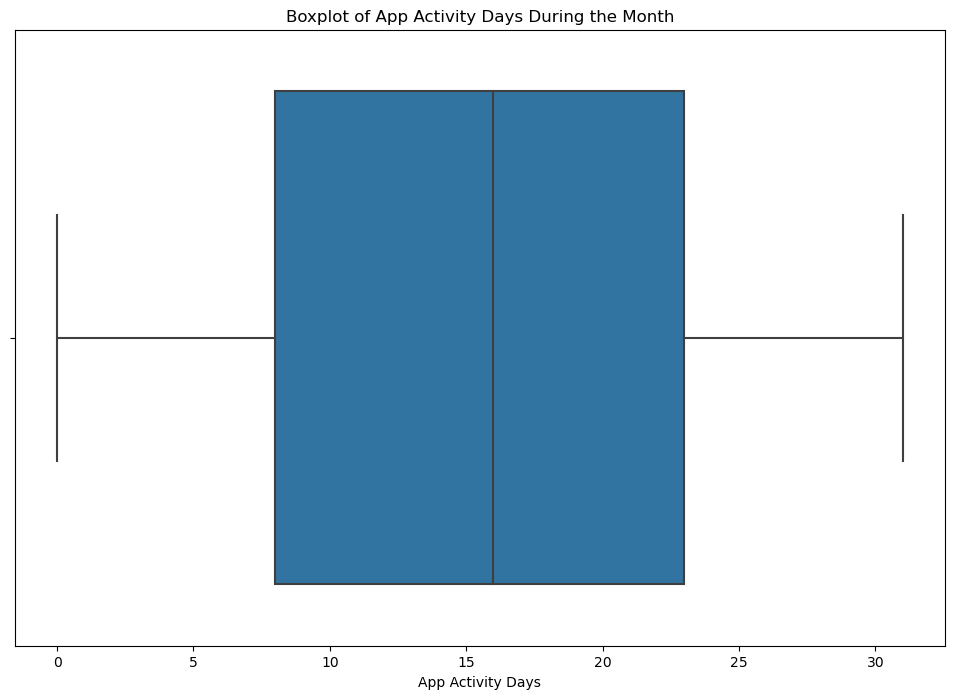

In [31]:
# Create a boxplot of activity_days
plt.figure(figsize = (12,8))
sns.boxplot(x = 'activity_days',
           data = df)
plt.xlabel('App Activity Days')
plt.title('Boxplot of App Activity Days During the Month')
plt.show()

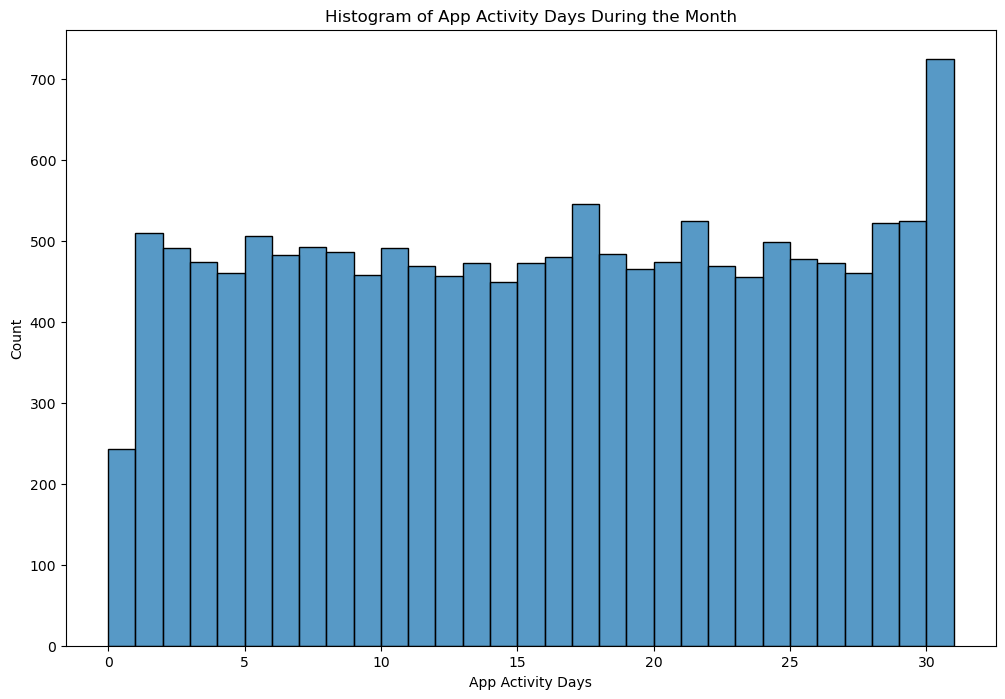

In [32]:
# Create a histogram of activity_days
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'activity_days',
             bins = 31)
plt.xlabel('App Activity Days')
plt.title('Histogram of App Activity Days During the Month')
plt.show()

The boxplot for **activity_days** shows a relatively centered distribution with a median of about 16 days for the number of times users opened the app. The histogram shows a near-uniform distribution of close to 500 users opening the app on each count of activity day. The histogram also reveals that around 250 users didn't open the app at all, while >700 users opened the app every day.

### **driving_days**
(number of days a user drives at least 1 km during the month)

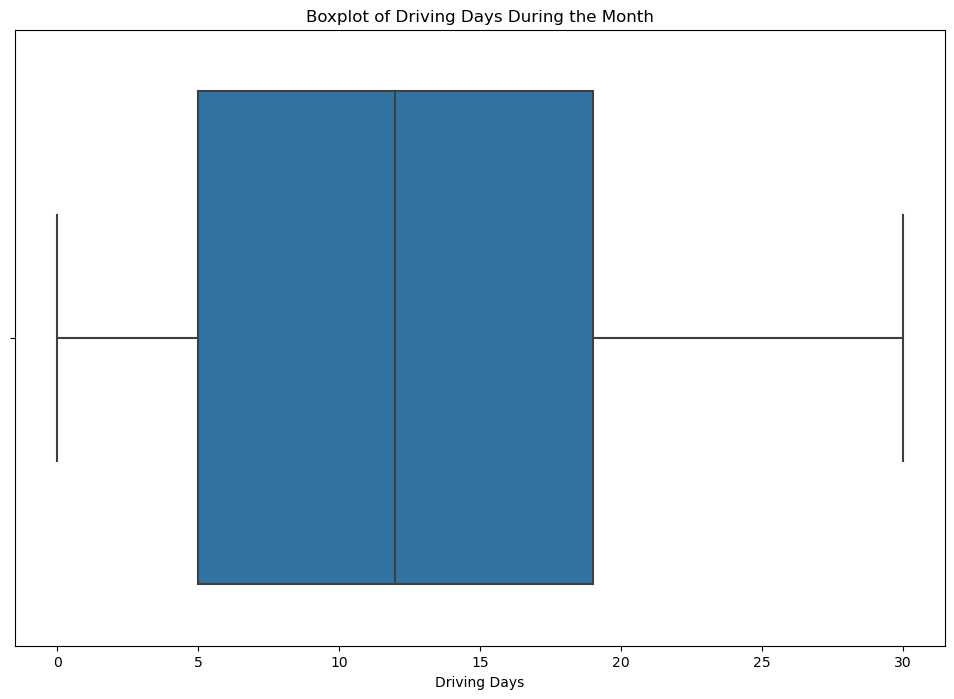

In [33]:
# Create a boxplot of driving_days
plt.figure(figsize = (12,8))
sns.boxplot(x = 'driving_days',
           data = df)
plt.xlabel('Driving Days')
plt.title('Boxplot of Driving Days During the Month')
plt.show()

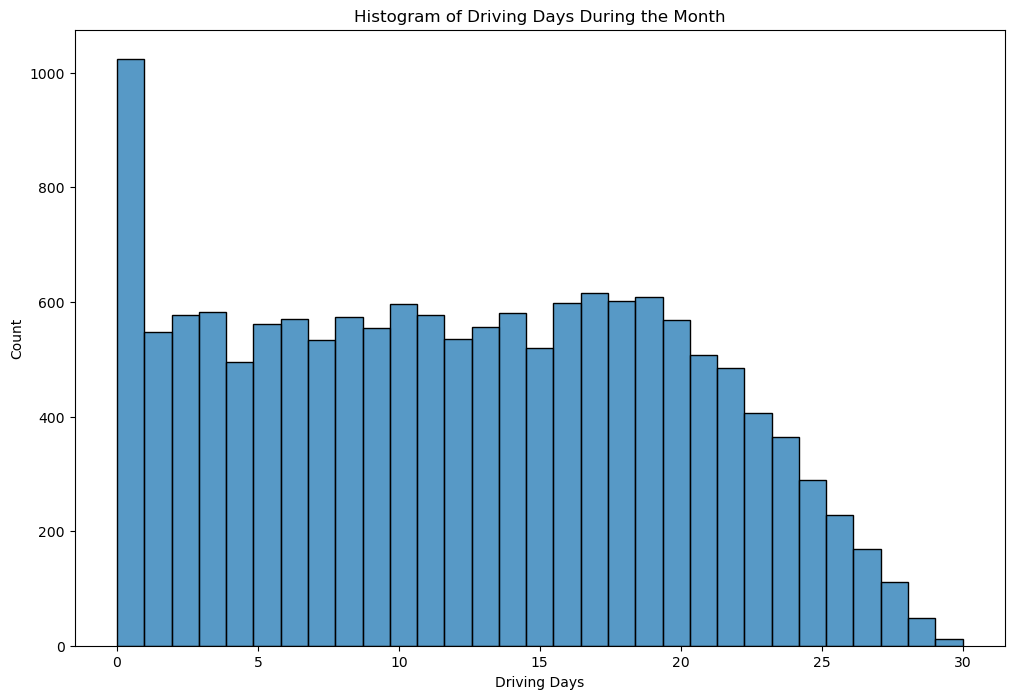

In [34]:
# Create a histogram of driving_days
plt.figure(figsize = (12,8))
sns.histplot(data = df,
            x = 'driving_days',
             bins = 31)
plt.xlabel('Driving Days')
plt.title('Histogram of Driving Days During the Month')
plt.show()

The **driving_days** variable shows a near-uniform distribution up to about 21 days, then tails off to the right. The number of days users drove over 1 km each month is relatively correlated with the number of days users opened the app. Interestingly, there were >1000 users who did not drive at all during the month which seems odd when compared to the **activity_days** data. This observation may warrant further investigation.

### **device**
(the type of device a user starts a session with)

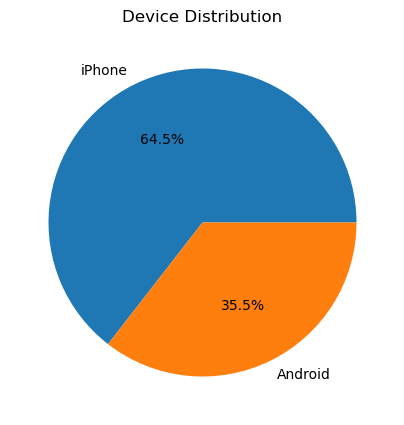

In [35]:
# The device variable is categorical so a boxplot and histogram don't apply
# A visualization such as a pie chart would be a decent choice

# Create a pie chart to visualize the device variable:
device_count = df['device'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(device_count,
        labels = device_count.index,
        autopct = '%1.1f%%')
plt.title('Device Distribution')
plt.show()

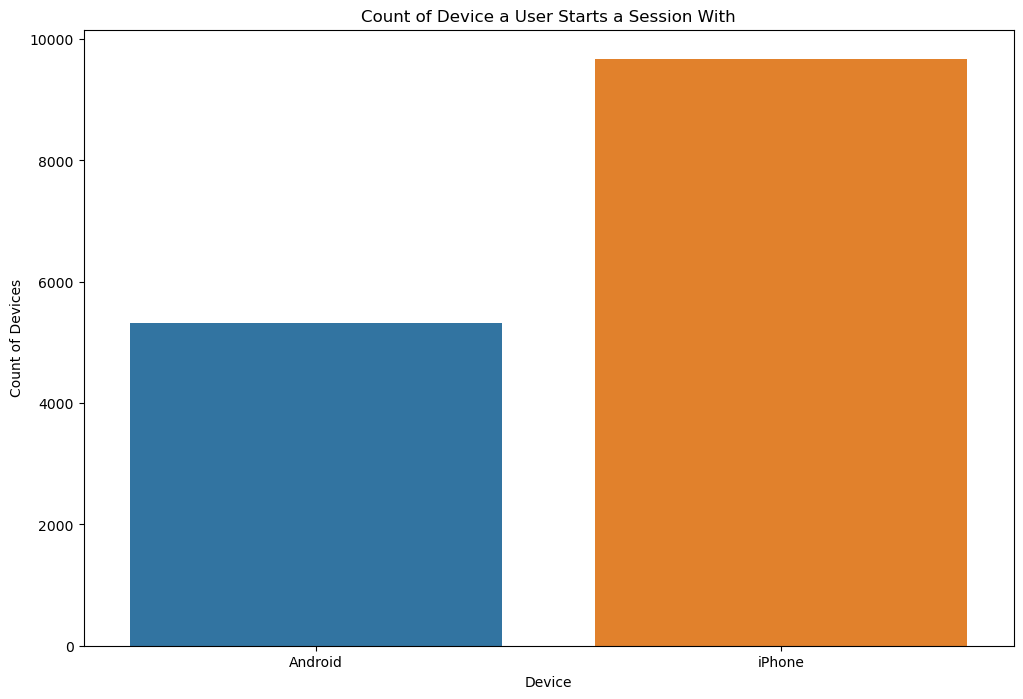

In [36]:
# Device count can also be displayed using a bar chart:
plt.figure(figsize = (12,8))
sns.countplot(x = 'device',
              data = df)
plt.xlabel('Device')
plt.ylabel('Count of Devices')
plt.title('Count of Device a User Starts a Session With')
plt.show()

The data above shows iPhones are used nearly 2x as Android devices.

### **label**
(binary target variable ["retained" vs "churned"] if a user has churned during the course of the month)

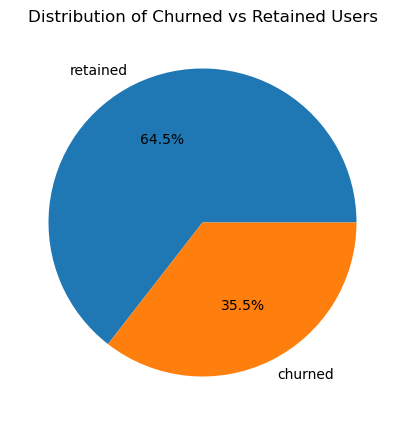

In [37]:
# Similar to device, label is a categorical variable so boxplots cannot be used
# Create a pie chart and bar plot for the label variable
label_count = df['label'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(device_count,
        labels = label_count.index,
        autopct = '%1.1f%%')
plt.title('Distribution of Churned vs Retained Users')
plt.show()

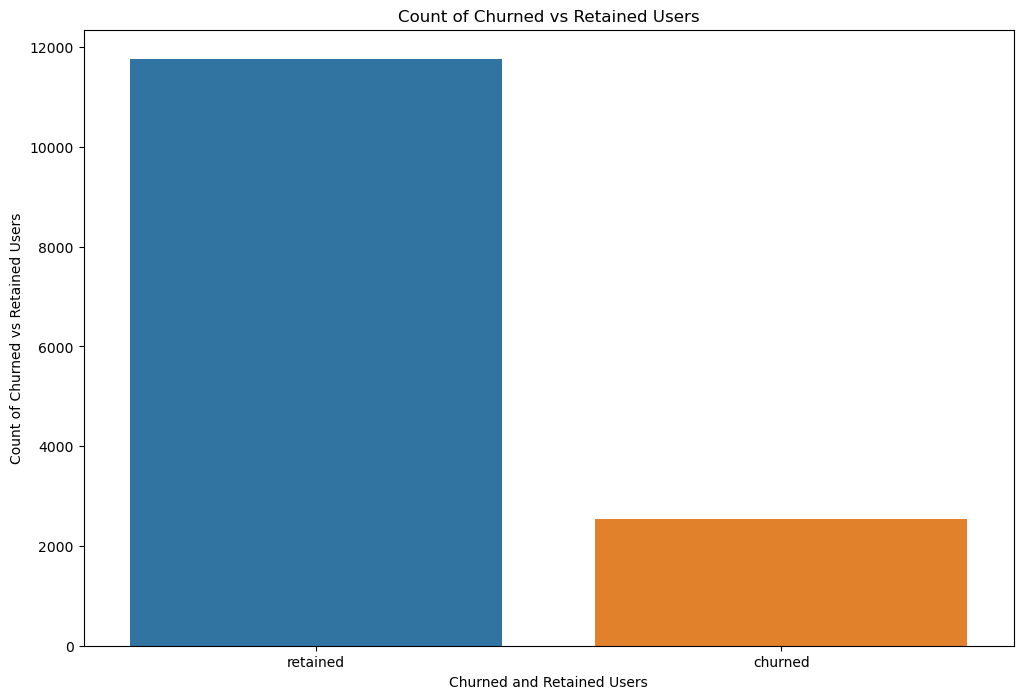

In [38]:
# Bar plot:
plt.figure(figsize = (12,8))
sns.countplot(x = 'label',
              data = df)
plt.xlabel('Churned and Retained Users')
plt.ylabel('Count of Churned vs Retained Users')
plt.title('Count of Churned vs Retained Users')
plt.show()

Data for the **label** variable show that, within a month, there were significantly more retained users than those that churned, approximately 82 vs 18%, respectively.

### **driving_days** vs **activity_days**
As determined earlier, the **driving_days** and **activity_days** variables are closely related and represent counts of days over the month the data were collected. These two variables can be plotted on a single histogram to better understand how they related to each other.

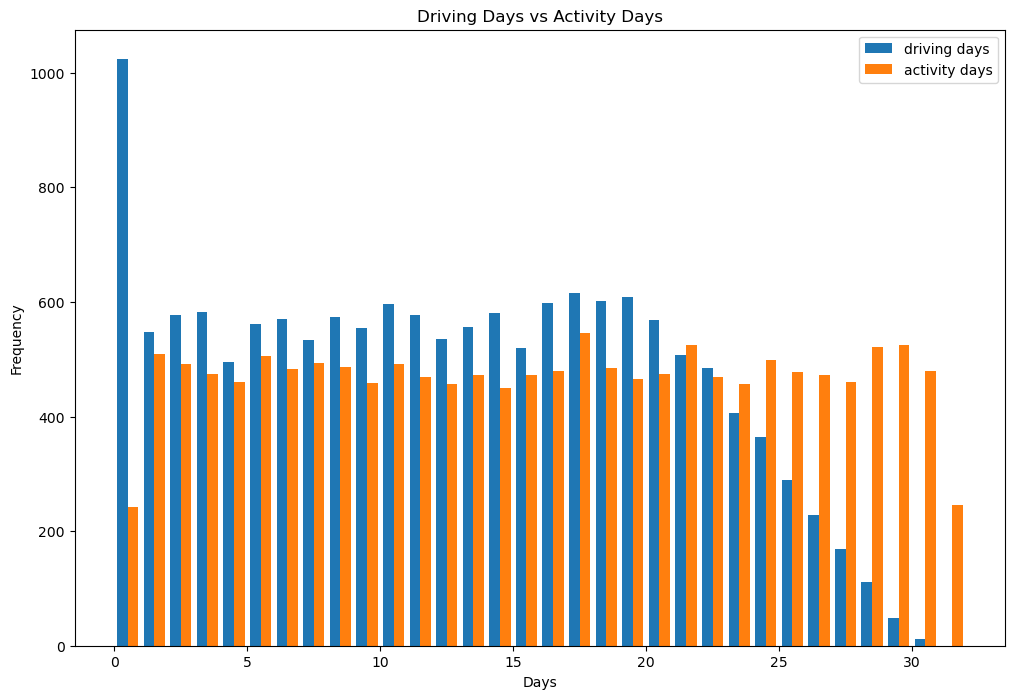

In [39]:
# Plot a histogram with bars for driving_days and activity_days:
label = ['driving days', 'activity days']

plt.figure(figsize = (12,8))
plt.hist([df['driving_days'], df['activity_days']],
         bins = range(0,33),
         label = label)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Driving Days vs Activity Days')
plt.legend()
plt.show()

As mentioned previously, these two variables show that there are fewer people who didn't use the app than there are people who didn't drive at all, a fact which seems couterintuitive. One explanation could be that although these variables are related to each other, but aren't at all correlated. That is, users may open the app more than they use it to drive, potentially using it to check routes or drive times, or opened the app by mistake. This is a case where questioning stakeholders would be worthwhile in order to obtain more information, particularly because it appears that the number of days in the month is not the same between variables. This can be confirmed with a quick check:

In [40]:
# Confirm the maximum number of days for the variables driving_days and activity_days
driving_days_max = df['driving_days'].max()
activity_days_max = df['activity_days'].max()
print(f'Max Driving Days: {driving_days_max}')
print(f'Max Activity Days: {activity_days_max}')

Max Driving Days: 30
Max Activity Days: 31


The result above confirms that the **driving_days** and **activity_days** variables have different max number of days. It's possible that not a single user drove all 31 days in the month represented by the dataset, but seems unlikely given that there are approximately 15,000 users.

The validity of these two variables can also be checked by using a scatterplot to compare, one on the x-axis and the other on the y-axis.

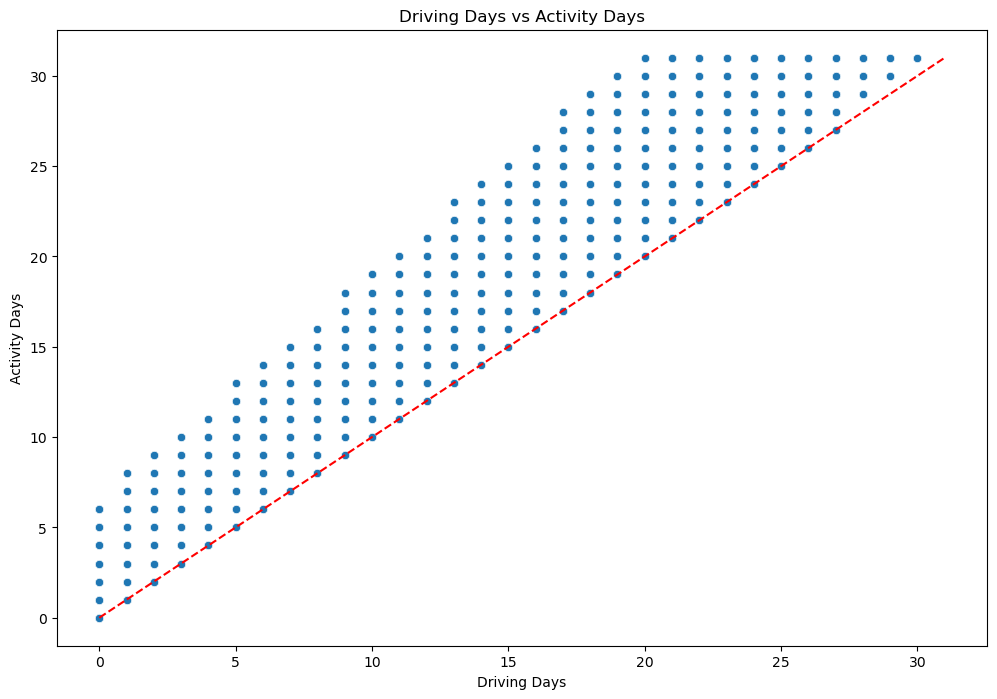

In [41]:
# Create a scatterplot of the driving_days and activity_days variables:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df,
                x = 'driving_days',
                y = 'activity_days')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')
plt.title('Driving Days vs Activity Days')
plt.plot([0,31], [0,31], color = 'red', linestyle = '--')
plt.show()

Plotting these two variables against each other reveals a theoretical limit where if the app is used to drive, then the drive must count as a driving day as well. That is, it is not possible to have more driving days than activity days.

### **Retention by Device**
A comparison of churned and retained users by device (iPhone vs Android) can be done using a histogram.

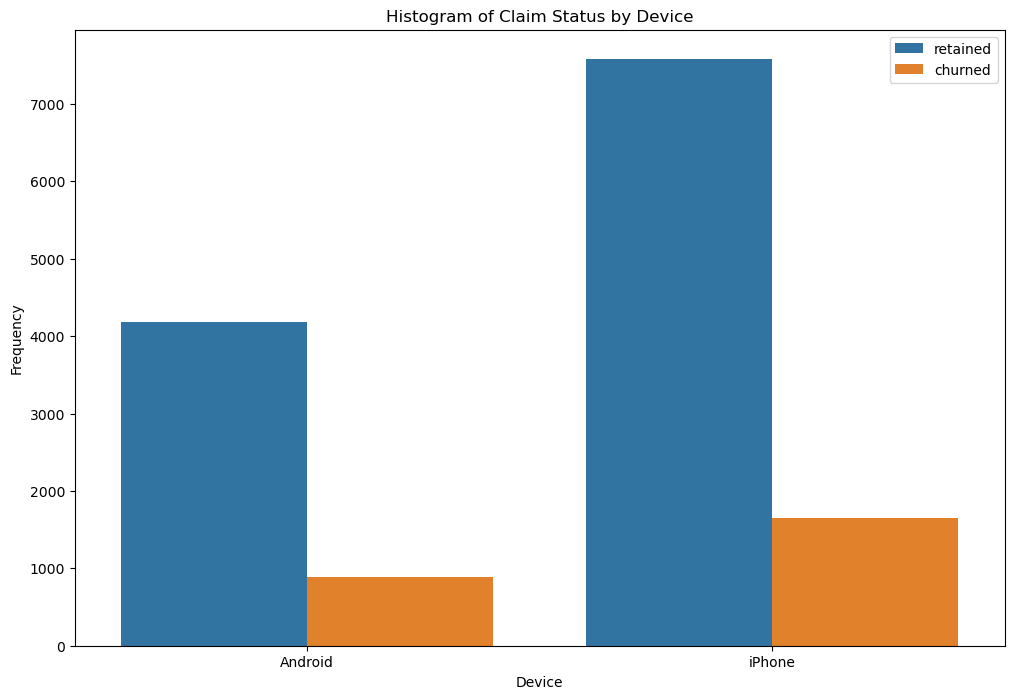

In [42]:
# Create a histogram with four bars, one for each device/label (churned/retained)
plt.figure(figsize = (12,8))
sns.countplot(x = 'device',
              hue = 'label',
              data = df)
plt.xlabel('Device')
plt.ylabel('Frequency')
plt.title('Histogram of Claim Status by Device')
plt.legend()
plt.show()

These data show that although more users use iPhones than Android devices, the ratio of retained to churned users per device appears relatively constant.

### **Exploring Retention by Kilometers Driven per Driving Day**
In the earlier **Inspection and Understanding of the Data** section, it was found that the median distance driven per driving day was 608.78 km for users who churned and 247.48 km for retained users. Understanding the statistics for this particular variable could help potentially help better understand driving habits between churned and retained users. Although the distance driven per driving day was calculated earlier, the data were not added to the dataframe.

In [43]:
# Create a new column km_per_driving_day
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Show the summary statistics for the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The fact that the mean and max statistics show a value of infinity and the standard deviation is NaN means the **driving_days** variable must have entries of 0. This problem can be rectified by replacing the inf values in the column with zeros.

In [44]:
# Convert inf values to 0
df['km_per_driving_day'] = df['km_per_driving_day'].replace([np.inf, -np.inf], np.nan)
df['km_per_driving_day'].fillna(0, inplace = True)

# Show the new summary statistics for the km_per_driving_day column
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

With the **km_per_driving_day** values fixed, there are some interesting observations in the summary statistics. First, the mean distance driven per day is nearly 579 km (~360 miles), which seems like a lot compared to a typical driver and reinforces the thought that this dataset might contain a significant amount of data for long-haul drivers such as truckers.

Second, the max value is 15,420 km (~9,581 miles) which would be impossible to drive in a day. Assuming the average highway speed is about 113 km/hour (~70 mi/hr), a 12 hour driving day would calculate to 1,356 km driven per day.

With this summary information and new assumptions about driving distances, a histogram can be created that compares churn rate vs mean daily driving distance, disregarding users with values over 1,356 km. 

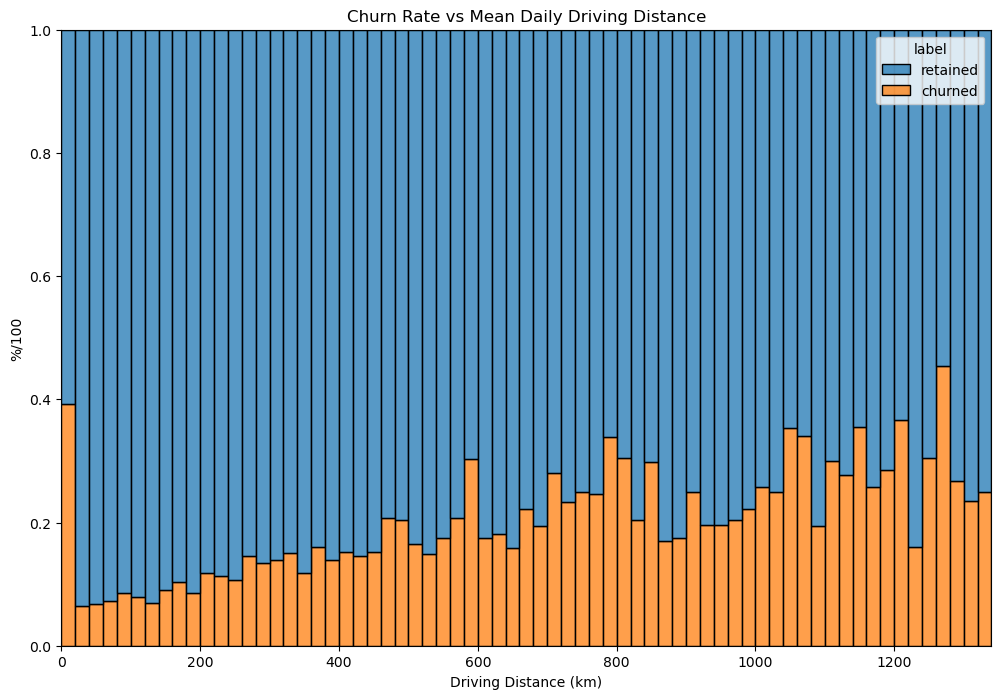

In [45]:
# Create the histogram described above
plt.figure(figsize = (12,8))
sns.histplot(data = df,
             x = 'km_per_driving_day',
             hue = 'label',
             multiple = 'fill',
             bins = range(0,1360,20))
plt.xlabel('Driving Distance (km)')
plt.ylabel('%/100')
plt.title('Churn Rate vs Mean Daily Driving Distance')
plt.show()

As seen in the histogram above, the churn rate has a clear increasing trend as the mean daily driving distance increases. This observation is worth investigating to determine the reason for long-distance drivers discontinuing the use of the app.

### **Churn Rate per Number of Driving Days**
A histogram similar to the one above can be created to determine the trend in churn rate per the number of driving days per user. This comparison would be useful to visualize any correlation between app use and churn/retained rate.

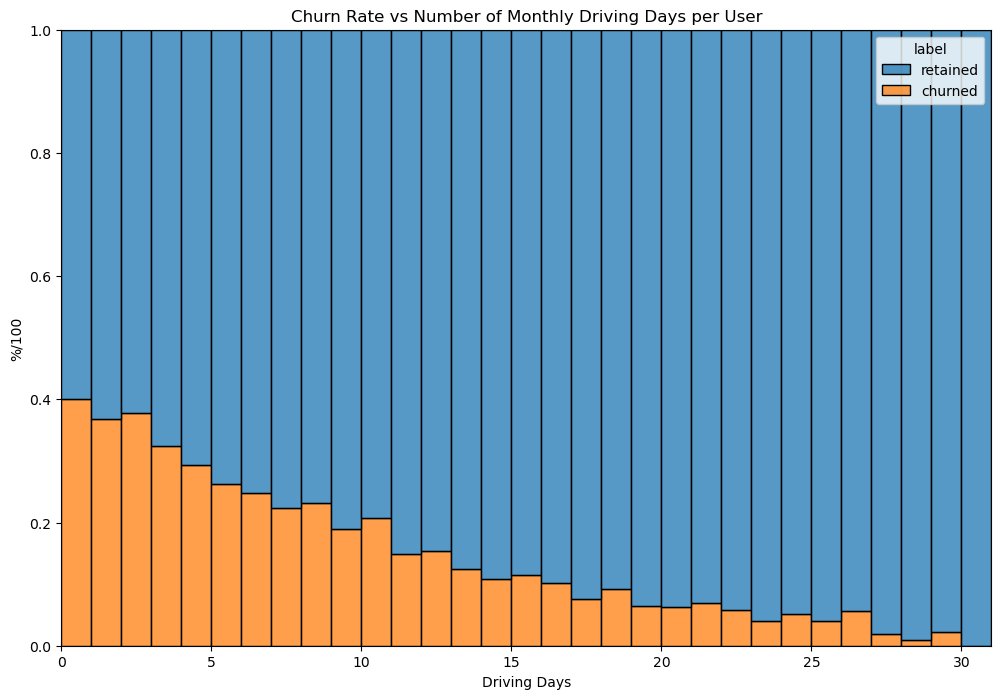

In [46]:
plt.figure(figsize = (12,8))
sns.histplot(data = df,
             x = 'driving_days',
             hue = 'label',
             multiple = 'fill',
             bins = range(0,32))
plt.xlabel('Driving Days')
plt.ylabel('%/100')
plt.title('Churn Rate vs Number of Monthly Driving Days per User')
plt.show()

The histogram above shows the churn rate high for users who didn't use the app much (nearly 40% for those only driving 0 to 3 times), whereas the churn rate is lowest for users driving many times a month. These results aren't unexpected:  if users who used the app for drives showed high churn rate, this could indicate dissatisfaction with the Waze app. Conversely, users who don't use the app but still churn could be due to factors such as past dissatisfaction, a sudden diminshed need for a navigational app, or increased use of alternative transportation such as public services, biking or walking.

### **Proportion of sessions Occurring in the Last Month**
Next, determine the percentage of sessions (where a session is the number of times a user opened the app during the month). This can be used to compare to the **n_days_after_onboarding** to investigate the rate in which users are using the Waze app after installing.

In [47]:
# Create a new column for the percentage of sessions in the last month:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# Determine the median of this new column:
median_value = round((df['percent_sessions_in_last_month'].median()),2)
print(f'Median value: {median_value}')

Median value: 0.42


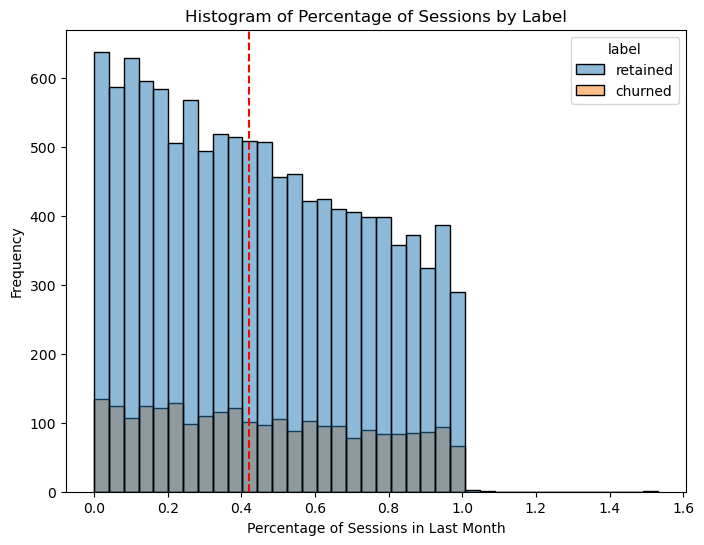

In [48]:
# Create a histogram of the percent_sessions_in_last_month column
# with a line showing the median value:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, 
             x='percent_sessions_in_last_month', 
             hue='label', 
             multiple='layer')
plt.axvline(median_value, color='red', linestyle='--')
plt.xlabel('Percentage of Sessions in Last Month')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage of Sessions by Label')
plt.show()

In [49]:
# Next, determine the median value of the n_days_after_onboarding variable
median_days = df['n_days_after_onboarding'].median()
print(f'Median Days After Onboarding: {median_days}')

# Convert this to years
median_years = round((median_days / 365),1)
print(f'Median Years After Onboarding: {median_years}')

Median Days After Onboarding: 1741.0
Median Years After Onboarding: 4.8


The data generated above show that half (median) the users in the dataset had >40% of their sessions in the last month, but the median time since onboarding is nearly 4 years.

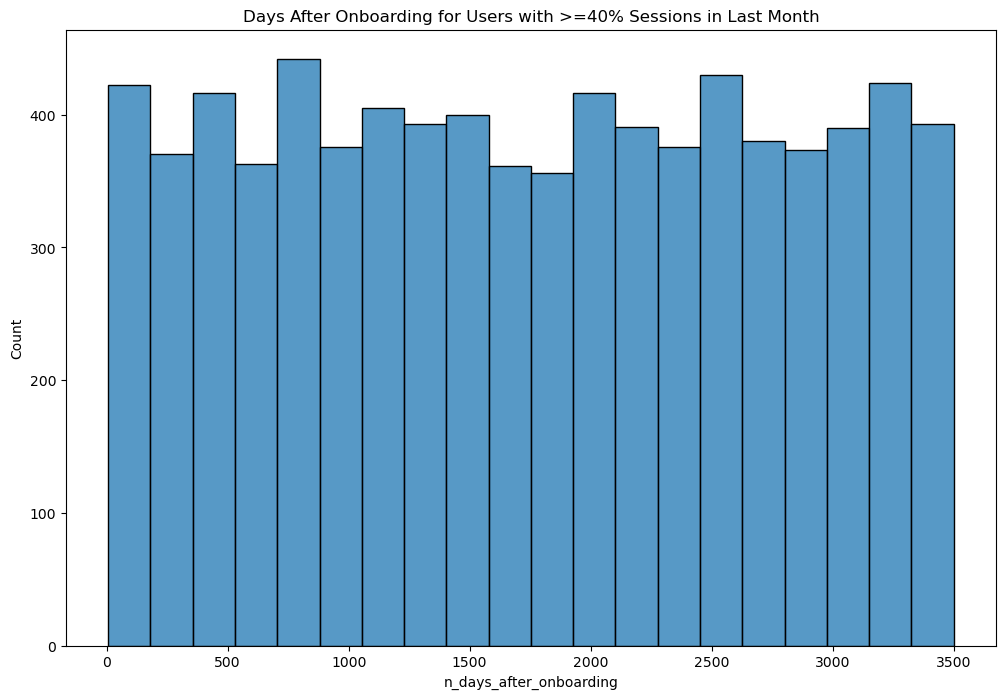

In [50]:
# Create a histogram of n_days_after_onboarding for users with >=40%
# of their sessions in the last month:
data = df.loc[df['percent_sessions_in_last_month'] >= 0.4]
plt.figure(figsize = (12,8))
sns.histplot(x = data['n_days_after_onboarding'])
plt.title('Days After Onboarding for Users with >=40% Sessions in Last Month')
plt.show()

The histogram above shows a uniform distribution for the number of days since onboarding for users with 40% or greater of their total sessions ocurring in the last month. This means that many of the long-time users are using the app a significant amount of time over the last month, a discovery that would be worth bringing up to the Waze stakeholders.

### **Addressing Outliers**
Many of the boxplots created above show high incidence of outlier data. Analysis shows that the majority do not seem to be data entry errors and are present due to right-skewed distributions.

One method for dealing with outliers is to impute the outlying data with more reasonable values, performed by setting a threshold based on a percentile of the distribution.

A function can be coded that calculates, in this case, the 95th percentile of a given column then imputes values greater than the 95th percentile.

In [51]:
# Define a function to determine values greater than the 95th percentile
# for any given column
def outlier (column_name, percentile):
    # first calculate the threshold
    threshold = df[column_name].quantile(percentile)
    # impute the threshold for values > than the defined threshold
    df.loc[df[column_name] > threshold, column_name] = threshold
    
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, round((threshold),2)))

Using a **for** loop, the **outlier** function can then be applied to all columns of interest.

In [52]:
# Apply the outlier function to all columns of interest by using a for loop:
for column in ['sessions', 'drives', 'total_sessions', 'driven_km_drives',
               'duration_minutes_drives']:
    outlier(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.36
         driven_km_drives | percentile: 0.95 | threshold: 8889.79
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.9


In [53]:
# use the describe function to display the dataframe statistics after
# applying the changes based on thresholdL
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


### **Conclusions**
Upon exploring the variables, most exhibited either a significant right-skew or uniform distribution. The right-skewed data suggest that the majority of users tend toward lower values. Conversely, uniform distributions imply an equal likelihood of users having values across the entire range for that variable.

While most of the data appear sound, certain variables display improbable or even impossible outlier values, like the 'driven_km_drives.' Additionally, discrepancies in 'activity_days' and 'driving_days'—one with a max of 31 and the other 30—raise concerns about data collection occurring in the same month for both.

This exploration uncovered intriguing points for further inquiry. Confirming if monthly variables were indeed collected simultaneously becomes essential due to the days' inconsistencies. Also, the sudden significant surge in app usage during the last month prompts questions about any potential changes driving such behavior.

Analyzing churn rates reveal that less than 18% of users churned, with approximately 82% retained. The distance driven per driving day positively correlated with churn, suggesting that users driving longer distances were more likely to churn. Conversely, a negative correlation appeared between the number of driving days and churn, implying that more driving days in the last month reduced the likelihood of churn.

The dataset revealed a uniform distribution in the histogram for 'n_days_after_onboarding,' indicating a balanced representation among users, irrespective of their duration or time since joining.

## Statistical Analysis

**Scenario:** Waze stakeholders have requested an analysis of the relationship between mean amount of rides and device type. Specifically, is there a statistical difference in the mean amount of rides between iPhone and Android users. To do this, a two-sample hypothesis test (t-test) should be used to analysze the difference.

In [1]:
# Import the necessary statistical packages
from scipy import stats

In [54]:
# Review the first few lines of the dataframe again
df.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186


One method to look at the relationship between device type and number of drives is to determine the mean number of drives grouped by device type.

In [56]:
# Determine the mean number of drives grouped by device type
mean_drives_by_device = df.groupby('device')['drives'].mean()
mean_drives_by_device

device
Android    63.353482
iPhone     64.446340
Name: drives, dtype: float64

These results show that drivers who use the Waze app on iPhones have a higher number of drives on average compared to Android users. However, this difference may arise from random sampling rather than being a true difference. A hypothesis test should be conducted to determine whether the difference is statistically significant.

First state the null and alternative hypotheses:
> -Null Hypothesis $H_0$: There is no difference in the average number of rides for iPhone users versus Android users.<br>
> -Alternative Hypothesis $H_A$: There is a difference in the average number of rides for iPhone users versus Android users.

Assuming a significance level of 5%, use a two-sample t-test to determine statistical significance.

In [57]:
# Isolate the number of drives for both iPhone and Android users
iphone_drives = df[df['device'] == 'iPhone']['drives']
android_drives = df[df['device'] == 'Android']['drives']

# Perform the t-test
stats.ttest_ind(iphone_drives, android_drives, equal_var = False)

Ttest_indResult(statistic=1.1643714136026293, pvalue=0.24429844267242223)

Given that the p-value result of 0.24 is greater than the significance level of 0.05, the null hypothesis is not rejected. This means that there is not enough statistical evidence to suggest a significant difference in the mean amount of rides between iPhone and Android users.